# <font color='DarkBlue'>MANHATTAN PLOT PRACTICAL NOTEBOOK

<hr>
    
Dr Graham Sellers g.sellers@hull.ac.uk

## <font color='DarkBlue'>Genome-wide association studies (GWAS)

Sequenced genomes from multiple individuals of a species are "scanned" for single nucleotide polymorphisms (SNPs) and compared to detect any that associate with specific traits. These studies are usually focused on groups, or populations, that exhibit physical variation. GWAS outputs each SNP shared between genomes and its probability of error (*p-value*) in association with the trait of interest.

In this practical we will look at how to visiualise GWAS data in the form of Manhattan plots.  
We will also look at interpretting the results and what they mean in the big picture.  

First, we shall learn the process on a small test data and then move on to applying it to some real-world large data.  

This practical will give some:  
* Experience in visiualising big GWAS data
* Knowledge of how to interpret a Manahattan plot
* Understanding of how candidate genes for selection can be detected



## <font color='DarkBlue'>Section 1: Manahttan plot creation
In this section we will learn how to deal with GWAS data and how to make a Manhattan plot in *R*.  \
We will get to grips with the process on the small test data provided.  

### Step 1: Import the data

#### Read in the data:

The input file is a tab-delimited text file (i.e. each column is separated by <-TAB->).  
So here weuse the `read.csv()` function and include `sep = '\t'` to make *R* read it in correctly as tab-delimited.  
The `header = TRUE` bit keeps the column names as headers - we'll kinda need these.  


In [ ]:
test = read.csv('data/test_gwas.txt', sep = '\t', header = TRUE)

### STEP 2: Explore the data

#### Lets have a look at the data:
Use `head()` to eyeball the first 6 rows of our data:

In [ ]:
head(test)

Now use `names()` to see the names of each column:

In [ ]:
names(test)

How big is our dataframe? `dim()` gives the dimensions in two numbers:  
*(The first is number of rows, second is columns)*

In [ ]:
dim(test)

#### What is it we have?

We have a dataframe of SNPs from a GWAS analysis.  
Each row is data representing a SNP.  
So, 21,751 SNPs in total!  
  
The 4 columns are:  
"chrom", "bp", "pvalue", and "gene"

"chrom": the chromosome the SNP is located on.  
"bp": the position (base pair) at which the SNP occurs on the chromosome.  
"pvalue": the probability of the GWAS association for the SNP (*p-value*).  
"gene": the gene the SNP is located in on the chromosome.  
  
We are specifically interested in the probability of the GWAS per SNP, so lets quickly `plot()` the *p-values*:

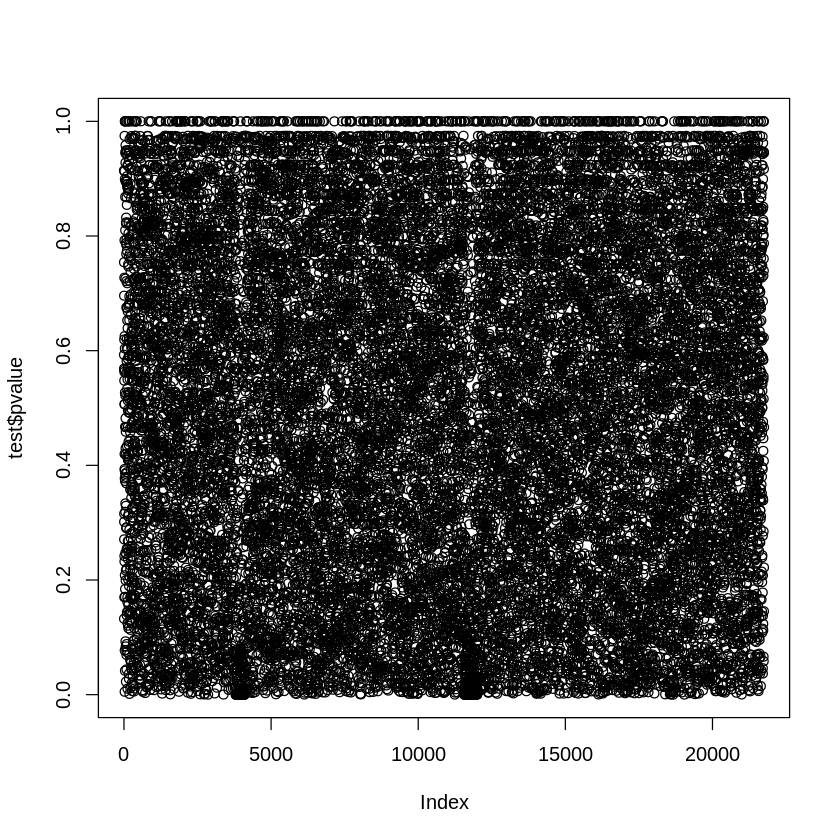

In [28]:
plot(test$pvalue)

**This makes no sense at all! So, lets look at it properly...**  
  
When dealing with GWAS data, there are often many orders of magnitude difference in probability. To account for this, and to normalise the data, we negative log 10 transform the *p-values*, i.e. -log10(*p-value*).

A fixed genome wide *p-value* of 5 × 10−8 is widely used to identify SNP association in GWAS. This translates into -log10(5e-8) (~7.3) for the threshold used in context of a Manhattan plot. Log transformed *p-values* must exceed this threshold before they are considered "significant". This means that a SNP is only considered if it has a *p-value* ≤ 0.00000005.  

So let's `plot()` the -log10 *p-values* and add in a dashed line at y = -log10(5e-8) using `abline()`:

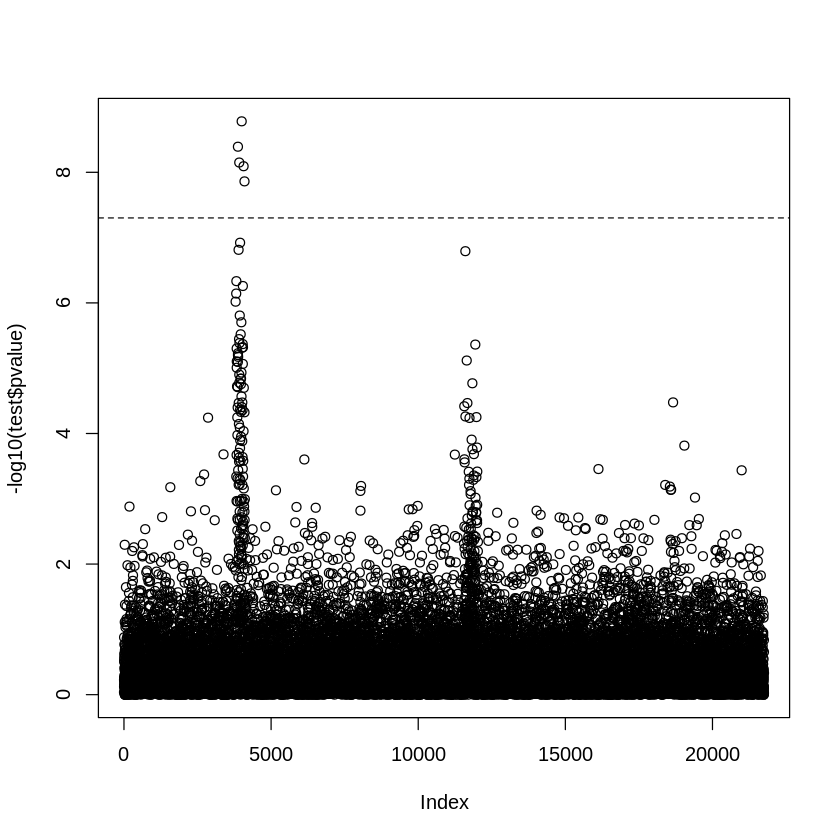

In [29]:
plot(-log10(test$pvalue))

abline(h = -log10(5e-8), lty = 2)

**OK, now we have something!**  

There are clearly some points above the threshold.  
But what does this mean?  
Where are the chromosomes and which genes are important?  

So many questions (no really, I'm Sure... riveting isn't it)

### STEP 3: Plot the data
*R* is a very powerful analytic tool. It, like many others, has the ability to create functions.  
Functions are small "programs" that execute a set of commands.  
Here we will use a premade function that will perform the heavy lifting for this practical.

**!DO NOT PANIC!** This is as simple as point-and-click. Once clicked, forever in memory. We're good to go :)
  \
  \
  We are going to import the code for the function from the "function" directory that forms part of this practical:

In [ ]:
source('functions/man.plot.R')

The function is now loaded into the *R* session and will persist until you close the notebook  
#### The function and how to use it:
The function, `man.plot()`, importantly plots the figure clearly but it also:  
* gives the transformed *pvalue* i.e -log10()
* gives relative basepair position on the chromosome (*shows the closeness of the SNPs*)
* seperates, labels and colours the chromosomes (*to better dinstinguish them*)
* adds on the threshold line at -log10(5e-8)
* highlights significant SNPs  
* labels significant SNPs with the relevant gene they are located on
* generates an output dataframe of all significant genes  


Use `man.plot()` to plot the data:  
*NB: we need to assign an R object, here called "test_plot", to the output of the function*

In [ ]:
test_plot = man.plot(test)

Looking at the function description above above there should be some useful information in the *R* object we created with the plot.

**Questions:**  
What would you expect to see?  
What could we do with this information?

Now let's call back the *R* object we created and have a look at what we have: 

In [ ]:
test_plot

### Tweaking the plot
There are some small aesthetic adjustments that can be made to the plot. We can change the colour and size of points, zoom in on specific chromosomes. These small tweaks can make a plot feel like your own, plus it's a bit of practice in itself.  
  
Take a moment to look at the arguments we can feed in to the function:  

`man.plot(df, chroms, threshold, highlight, point.cex, point.cols, line.col)`

| Argument | Description |
| :----------- | :----------- |
| **df**     | a gwas dataframe | 
| **chroms** | a list of chromosomes to isolate
| **threshold** | value for the significance threshold for SNPs | 
| **highlight** | colour for highlighting significant SNPs | 
| **point.cex** | point size | 
| **point.cols** | a list of colours for alternating chromosomes | 
| **line.col** | colour for the significance threshold line |
  
  

In the cell below there is the code to look at chromosomes 5, 13 and Y in the test data. The threshold value is changed to 7.5, the chromosomes are coloured lightblue, pink and purple. SNPS above the threshold line (now orange) are highlighted blue and the plot points are much larger.  
  
Run the code. Then tweak the parameters to what you wish and run it again.

In [ ]:
test_plot = man.plot(test,
                     chroms = c('5', '13', 'Y'),
                     threshold = 7.5,
                     highlight = 'blue',
                     point.cex = 1.5,
                     point.cols = c('lightblue', 'pink', 'purple'),
                     line.col = 'orange')

### Exporting the plot

Plots viewed in the cells of a notebook are not ideal. It can be difficult to read text or see points clearly, and you can't (*easily*) add them to a document. For these reasons it is better to save them out as an image file.  

In _R_ this can be done with `png()`, a basic function that allows you to customise the name and dimensions of your plot.  

Lets save the basic test plot as a png.  


In [ ]:
png('plots/test.png',  # path to file
    units = 'px',  # units of the image (in this case pixels)
    height = 600, width = 2000,  # height and width of plot in pixels (see units)
    pointsize = 30)  # size of the lines, text and points

# here is the basic man.plot() code:
test_plot = man.plot(test)

dev.off()  # finishes the command to save the image

The image is now saved in the "plots" directory. Go there and look at the image that has been created.  
  
**Questions:**  
How would you rename the image?  
What if you wanted the image to be more square?  
Where would you add the code for your personalised plot from above?  


## BIG DOG DATA


In [ ]:
height = read.csv('data/height_gwas.txt', sep = '\t', header = TRUE)

In [ ]:
height_plot = man.plot(height, threshold = 8.46)

In [ ]:
png('plots/height.png', height = 600, width = 2000, units = 'px', pointsize = 30)
par(mar = c(3, 1.5, 0, 1))

height_plot = man.plot(height, threshold = 8.46)

dev.off()

In [ ]:
height_plot